<a href="https://colab.research.google.com/github/2303A52247/SML/blob/main/SML_ASSIGNMENT_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


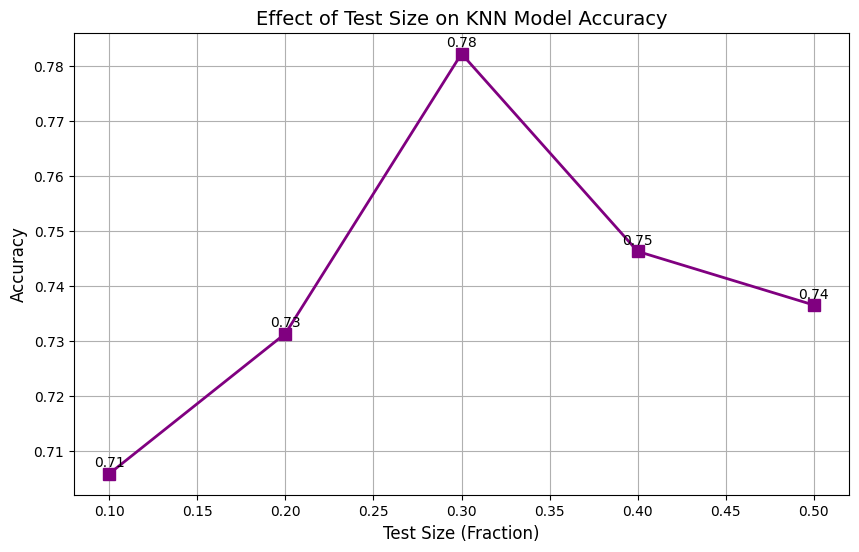

In [8]:
#Question 1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

file_path = '/content/breast_cancer_survival.csv'
data = pd.read_csv(file_path)

label_encoders = {}
categorical_columns = ['Gender', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type', 'Patient_Status']

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

data_cleaned = data.drop(['Date_of_Surgery', 'Date_of_Last_Visit'], axis=1)

X = data_cleaned.drop('Patient_Status', axis=1)
y = data_cleaned['Patient_Status']

def evaluate_knn_with_test_sizes(test_sizes):
    results = []
    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append((test_size, accuracy))
    return results

test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]
accuracy_results = evaluate_knn_with_test_sizes(test_sizes)

test_sizes = [x[0] for x in accuracy_results]
accuracies = [x[1] for x in accuracy_results]

plt.figure(figsize=(10, 6))
plt.plot(test_sizes, accuracies, marker='s', linestyle='-', color='purple', markersize=8, linewidth=2)
for i, txt in enumerate(accuracies):
    plt.annotate(f"{txt:.2f}", (test_sizes[i], accuracies[i]), textcoords="offset points", xytext=(0,5), ha='center', color='black')

plt.title('Effect of Test Size on KNN Model Accuracy', fontsize=14)
plt.xlabel('Test Size (Fraction)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True)
plt.show()


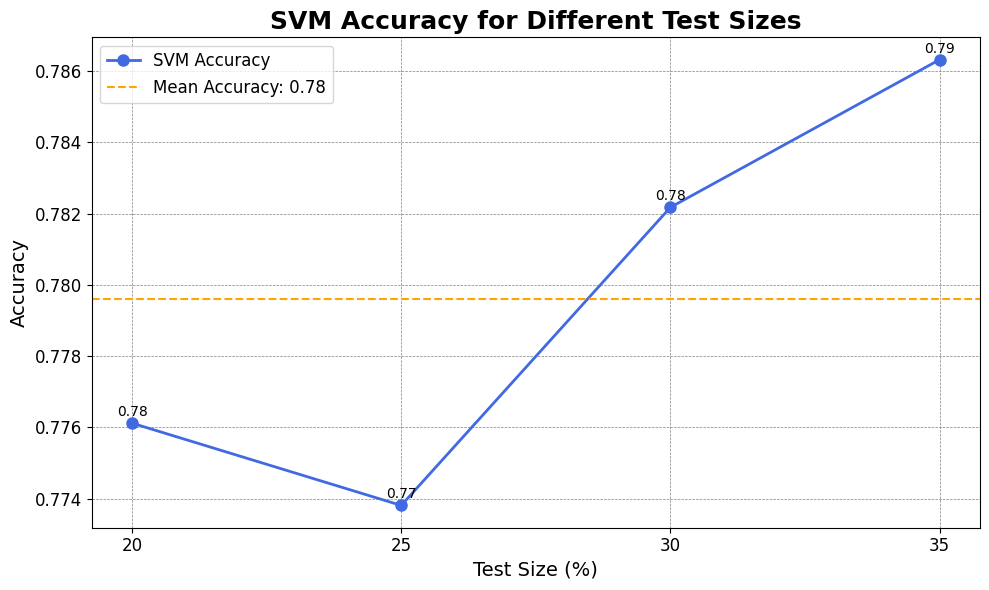

In [6]:
#Question 2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

file_path = '/content/breast_cancer_survival.csv'
data = pd.read_csv(file_path)

label_encoders = {}
categorical_columns = ['Gender', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type', 'Patient_Status']

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

data_cleaned = data.drop(['Date_of_Surgery', 'Date_of_Last_Visit'], axis=1)

X = data_cleaned.drop('Patient_Status', axis=1)
y = data_cleaned['Patient_Status']

def evaluate_svm_with_test_sizes(test_sizes):
    results = []
    for test_size in test_sizes:
        test_size_decimal = test_size / 100.0
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_decimal, random_state=42)
        svm = SVC(kernel='linear')
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append((test_size, accuracy))
    return results

test_sizes = [20, 25, 30, 35]
svm_accuracy_results = evaluate_svm_with_test_sizes(test_sizes)

test_sizes = [x[0] for x in svm_accuracy_results]
accuracies = [x[1] for x in svm_accuracy_results]

plt.figure(figsize=(10, 6))
plt.plot(test_sizes, accuracies,
         marker='o',
         markersize=8,
         linestyle='-',
         linewidth=2,
         color='royalblue',
         label='SVM Accuracy')

plt.title('SVM Accuracy for Different Test Sizes', fontsize=18, fontweight='bold')
plt.xlabel('Test Size (%)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(test_sizes, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

mean_accuracy = sum(accuracies) / len(accuracies)
plt.axhline(y=mean_accuracy, color='orange', linestyle='--', label=f'Mean Accuracy: {mean_accuracy:.2f}')
plt.legend(fontsize=12)

for i in range(len(test_sizes)):
    plt.annotate(f'{accuracies[i]:.2f}',
                 (test_sizes[i], accuracies[i]),
                 textcoords="offset points",
                 xytext=(0,5),
                 ha='center', fontsize=10)

plt.tight_layout()
plt.show()



